# Lekce 2

## Vytvoření vizualizace z více sérií

Nyní vytvoříme graf pro prezentaci výsledků. Můžeme např. zkombinovat čárový a sloupcový graf, kde čárový graf obsahuje plán tržeb a sloupcový skutečné tržby. Po prvním příkazu uložíme výsledek do proměnné `ax`. Metoda `.plot()` totiž vrací odkaz na vygenerovaný graf, abychom do něj mohli přidávat další data nebo jej dále upravovat. Ve druhém příkazu zadáme parametr `ax` a vložíme mu jako hodnotu graf `ax`. Tím říkáme, aby modul nevytvářel nový graf, ale vložil druhý (čárový) graf k prvnímu (sloupcovému).

Budeme potřebovat data [sales_actual.csv](sales_actual.csv) a [sales_plan.csv](sales_plan.csv), která jsme používali už v první lekci.

In [1]:
import pandas

# Tento kód je z minulé lekce
df_plan = pandas.read_csv("sales_plan.csv")
df_plan["sales_plan_cumsum"] = df_plan.groupby("year")["sales"].cumsum()
df_actual = pandas.read_csv("sales_actual.csv")
df_actual = df_actual.sort_values("date")
df_actual["date"] = pandas.to_datetime(df_actual["date"])
df_actual["month"] = df_actual["date"].dt.month
df_actual["year"] = df_actual["date"].dt.year
df_actual_grouped = df_actual.groupby(["year", "month"]).sum(numeric_only=True)
df_actual_grouped["sales_actual_cumsum"] = df_actual_grouped.groupby("year")["contract_value"].cumsum()
df_merged = pandas.merge(df_plan, df_actual_grouped, on=["month", "year"])

year = 2022
df_merged_plot = df_merged[df_merged["year"] == year]
df_merged_plot = df_merged_plot.reset_index()
df_merged_plot.head()

index  year  month       sales  sales_plan_cumsum  contract_value  \
0     12  2022      1  12000000.0         12000000.0       9798565.4   
1     13  2022      2   9000000.0         21000000.0      11314932.2   
2     14  2022      3   9000000.0         30000000.0      13173404.4   
3     15  2022      4  11000000.0         41000000.0      12718895.8   
4     16  2022      5  11000000.0         52000000.0       9546852.9   

   sales_actual_cumsum  
0            9798565.4  
1           21113497.6  
2           34286902.0  
3           47005797.8  
4           56552650.7

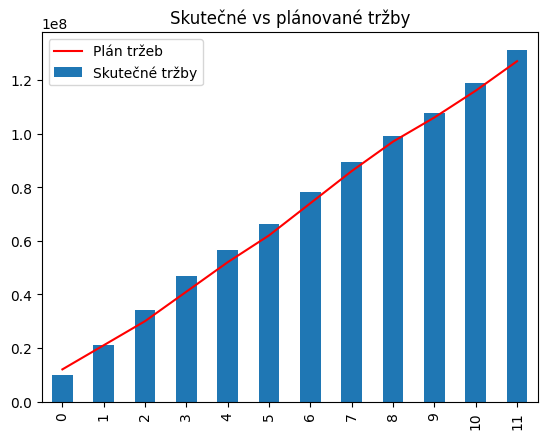

In [2]:
import matplotlib.pyplot as plt

# Sloupcový graf skutečných tržeb
ax = df_merged_plot["sales_plan_cumsum"].plot(color="red", title="Skutečné vs plánované tržby")
# Čárový graf plánovaných tržeb
df_merged_plot["sales_actual_cumsum"].plot(kind="bar", ax=ax)
# Popisky pro legendu grafu
plt.legend(['Plán tržeb', "Skutečné tržby"])

Z popisků osy X ale není jasné, jakého období se týká. Provo v tabulce vytvoříme sloupec, který bude označovat časové období a bude obsahovat číslo měsíce a rok (např. `1/2022`). Abychom si následně usnadnili vytvoření grafu, nastavíme tento sloupec jako index. K tomu využijeme metodu `set_index()`.

In [3]:
# Přidáme nový sloupec
df_merged_plot["period"] = df_merged_plot["month"].astype(str) + "/" + df_merged_plot["year"].astype(str)
# Nastavíme index
df_merged_plot = df_merged_plot.set_index("period")
df_merged_plot.head()

index  year  month       sales  sales_plan_cumsum  contract_value  \
period                                                                      
1/2022     12  2022      1  12000000.0         12000000.0       9798565.4   
2/2022     13  2022      2   9000000.0         21000000.0      11314932.2   
3/2022     14  2022      3   9000000.0         30000000.0      13173404.4   
4/2022     15  2022      4  11000000.0         41000000.0      12718895.8   
5/2022     16  2022      5  11000000.0         52000000.0       9546852.9   

        sales_actual_cumsum  
period                       
1/2022            9798565.4  
2/2022           21113497.6  
3/2022           34286902.0  
4/2022           47005797.8  
5/2022           56552650.7

Text(0.5, 0, 'Období')

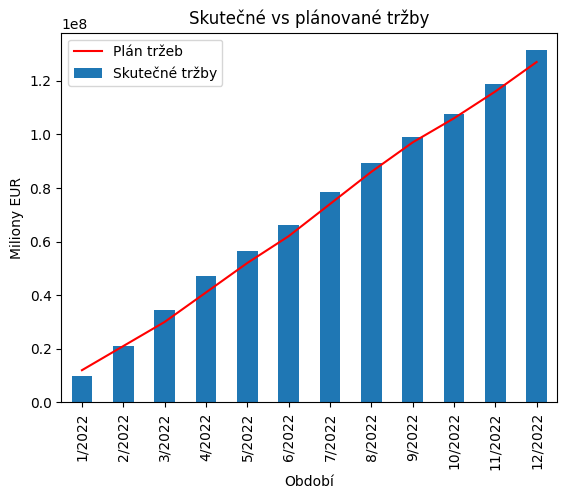

In [4]:
ax = df_merged_plot["sales_plan_cumsum"].plot(color="red", title="Skutečné vs plánované tržby")
df_merged_plot["sales_actual_cumsum"].plot(kind="bar", ax=ax)
plt.legend(['Plán tržeb', "Skutečné tržby"])
plt.ylabel("Miliony EUR")
plt.xlabel("Období")

## Kontingenční tabulky (pivot)

Pojem `pivot` obvykle překládáme jako kontingenční tabulka. Jde o tabulku, která porovnává dvě různé tzv. kategorie - jedna kategorie je použitá pro sloupce a druhá pro řádky. Pomocí kontingenční tabulky můžeme například porovnat tržby obchodních manažerů v jednotlivých zemích.

Pro sestavení kontingenční tabulky použijeme metodu `pivot_table`. Potřebujeme nastavit následující parametry:
- Sloupec, který použijeme pro sloupce sloupcovou a řádkovou dimenzi.
- Sloupec, který využijeme pro hodnoty, a agregační funkci.

Pokud chceme porovnat tržby sales manažerů pro jednotlivé země, použijeme sloupce `sales_manager` a `country` pro sloupce a řádky. Do "vnitřku" tabulky vložíme hodnoty sloupce `contract_value` a protože chceme vidět celkovou hodnotu, jako funkci použijeme `numpy.sum`.

Abychom si výsledky výpočtů trochu zpřehlednili, můžeme vydělit hodnotu sloupce `contract_value` milionem.

In [5]:
import pandas

df_actual = pandas.read_csv("sales_actual.csv")
df_actual.head()

date                 company country  contract_value sales_manager
0  2021-11-09          Allard LLC Inc  Canada        374511.0    Jones Leon
1  2023-01-03  Asselin and Sons Group  Canada        170005.2    Jones Leon
2  2023-01-19         Audet Group Ltd  Canada        465253.2    Jones Leon
3  2022-07-14         Audet-Cyr Group  Canada        747392.1    Jones Leon
4  2021-02-16     Beauchamp Inc Group  Canada        140489.0    Jones Leon

Pro větší přehlednost převedeme hodnoty `contract_value` na miliony.

In [6]:
df_actual["contract_value"] = df_actual["contract_value"] / 1_000_000
df_actual.head()

date                 company country  contract_value sales_manager
0  2021-11-09          Allard LLC Inc  Canada        0.374511    Jones Leon
1  2023-01-03  Asselin and Sons Group  Canada        0.170005    Jones Leon
2  2023-01-19         Audet Group Ltd  Canada        0.465253    Jones Leon
3  2022-07-14         Audet-Cyr Group  Canada        0.747392    Jones Leon
4  2021-02-16     Beauchamp Inc Group  Canada        0.140489    Jones Leon

Zkusme nejprve vytvořit přehledovou tabulku pomocí standardní agregace. Provedeme agregaci podle sloupců `sales_manager` a `country` a použijeme agregační funkci `sum()` pro sloupec `contract_value`.

In [7]:
df_actual_aggregated = df_actual.groupby(["sales_manager", "country"])["contract_value"].sum()
df_actual_aggregated = pandas.DataFrame(df_actual_aggregated)
df_actual_aggregated

contract_value
sales_manager country                       
Jones Leon    Canada               44.212760
              France               26.063882
              Italy                18.008563
              Netherlands          11.606895
Morgan Sarah  Canada                6.787855
              France                5.074422
              Italy                 4.047312
              Netherlands           4.009210
              USA                  23.110862
              United Kingdom       38.861613
Thomas Denise France               26.344092
              Italy                26.610211
              Netherlands          14.261435
Watts Emily   USA                   6.212289
              United Kingdom       10.289672

Nyní si zkusíme zobrazit stejnou informaci pomocí kontingenční tabulky, použijeme tedy funkci `pivot_table`.

Pozor, nepleť si funkci `pivot_table` a `pivot`! Funkci `pivot` též vytváří kontingenční tabulku, provádí však jen polovinu toho, co `pivot_table`. Přeskládá hodnoty v tabulce, ale neprovádí agregaci. Lze ji tedy použít pouze v případě, že pro každou kombinaci hodnot sloupců máš maximálně jeden záznam.

Nastavujeme následující parametry:
- `data` = tabulka, která obsahuje zdrojová data,
- `index` = sloupec sloužící jako řádková dimenze,
- `columns` = sloupec sloužící jako sloupcová dimenze,
- `values` = sloupec, ze kterého se počítají hodnoty uvnitř tabulky,
- `aggfunc` = funkce, která je použitá k výpočtu hodnot uvnitř tabulky.

data = z jaké tabulky vycházíme, 
values = jaký sloupec budeme sčítat/agregovat
index = do jakých řádků bude tabulka řazena - např. součet pro každou zemi
columns = dle jakých sloupců bude tabulka řazeny - např. součet každého prodejce
aggfunc = jako funkci budeme používat, např. sum
fill_value = 

In [8]:
df_actual_pivot = pandas.pivot_table(data=df_actual, values="contract_value", index="country", columns="sales_manager", aggfunc=sum, fill_value=0)
df_actual_pivot


sales_manager   Jones Leon  Morgan Sarah  Thomas Denise  Watts Emily
country                                                             
Canada           44.212760      6.787855       0.000000     0.000000
France           26.063882      5.074422      26.344092     0.000000
Italy            18.008563      4.047312      26.610211     0.000000
Netherlands      11.606895      4.009210      14.261435     0.000000
USA               0.000000     23.110862       0.000000     6.212289
United Kingdom    0.000000     38.861613       0.000000    10.289672

Často je zajímavé zobrazit si i celkový součet pro řádky a sloupce, ten získáme pomocí parametru `margins`.

In [9]:
df_actual_pivot_count = pandas.pivot_table(df_actual, values="contract_value", index="country", columns="sales_manager", aggfunc=sum, fill_value=0, margins=True)
df_actual_pivot_count

sales_manager   Jones Leon  Morgan Sarah  Thomas Denise  Watts Emily  \
country                                                                
Canada           44.212760      6.787855       0.000000     0.000000   
France           26.063882      5.074422      26.344092     0.000000   
Italy            18.008563      4.047312      26.610211     0.000000   
Netherlands      11.606895      4.009210      14.261435     0.000000   
USA               0.000000     23.110862       0.000000     6.212289   
United Kingdom    0.000000     38.861613       0.000000    10.289672   
All              99.892099     81.891276      67.215738    16.501961   

sales_manager          All  
country                     
Canada           51.000615  
France           57.482395  
Italy            48.666086  
Netherlands      29.877541  
USA              29.323152  
United Kingdom   49.151285  
All             265.501075

Zkusme nyní změnit agregační funkci a uvažujme, že nás zajímá počet uzavřených kontraktů pro jednotlivé země a sales manažery. Můžeme využít například funkci `len()`, kterou známe z určování délky řetězců a seznamů.

In [10]:
pandas.pivot_table(df_actual, values="contract_value", index="country", columns="sales_manager", aggfunc=len, fill_value=0, margins=True)

sales_manager   Jones Leon  Morgan Sarah  Thomas Denise  Watts Emily  All
country                                                                  
Canada                  96            14              0            0  110
France                  56            12             58            0  126
Italy                   38            10             63            0  111
Netherlands             27             9             30            0   66
USA                      0            51              0           11   62
United Kingdom           0            85              0           22  107
All                    217           181            151           33  582

### Relativní hodnoty v kontingenční tabulce

Občas mohou být zajímavější relativní hodnoty než absolutní. Uvažujme například situaci, kdy chceme vidět, kolik procent celkových tržeb v jednotlivých zemích zajistili jednotliví obchodníci. Abychom tuto informaci získali, vydělíme tržby jednotlivých obchodníků v jednotlivých zemích tržbami v celé zemi. 

Vydělení provedeme pomocí metody `div`. Výpočet spočívá v tom, že vydělíme hodnoty v řádcích tabulky součtem příslušného řádku. Proto je nutné vytvořit kontingenční tabulku s nastavením parametru `margins=True`.

In [11]:
df_actual_pivot = pandas.pivot_table(df_actual, values="contract_value", index="country", columns="sales_manager", aggfunc=sum, fill_value=0, margins=True)
df_actual_pivot_percentage = df_actual_pivot.div(df_actual_pivot.iloc[:,-1], axis=0)
df_actual_pivot_percentage

sales_manager   Jones Leon  Morgan Sarah  Thomas Denise  Watts Emily  All
country                                                                  
Canada            0.866906      0.133094       0.000000     0.000000  1.0
France            0.453424      0.088278       0.458298     0.000000  1.0
Italy             0.370043      0.083165       0.546792     0.000000  1.0
Netherlands       0.388482      0.134188       0.477330     0.000000  1.0
USA               0.000000      0.788144       0.000000     0.211856  1.0
United Kingdom    0.000000      0.790653       0.000000     0.209347  1.0
All               0.376240      0.308440       0.253166     0.062154  1.0

V tabulce například vidíme, že 96 % tržeb v Kanadě zajistil Jones Leon, 49 % tržeb ve Francii Thomas Denise atd.

Můžeme se na data podívat i z opačného úhlu a podívat se na procentuální rozdělení tržeb obchodníků v rámci zemí. K tomu potřebujeme vydělit tržby obchodníků v jednotlivých zemí celkovými tržbami jednotlivých obchodníků.

In [12]:
df_actual_pivot_percentage = df_actual_pivot.div(df_actual_pivot.iloc[-1,:], axis=1)
df_actual_pivot_percentage

sales_manager   Jones Leon  Morgan Sarah  Thomas Denise  Watts Emily       All
country                                                                       
Canada            0.442605      0.082889       0.000000     0.000000  0.192092
France            0.260920      0.061965       0.391933     0.000000  0.216505
Italy             0.180280      0.049423       0.395893     0.000000  0.183299
Netherlands       0.116194      0.048958       0.212174     0.000000  0.112533
USA               0.000000      0.282214       0.000000     0.376458  0.110445
United Kingdom    0.000000      0.474551       0.000000     0.623542  0.185127
All               1.000000      1.000000       1.000000     1.000000  1.000000

Z této tabulky vidíme, že Jones Leon zajistil třetinu svých tržeb v Kanadě a další třetinu ve Francii, Morgan Sara polovinu tržeb ve Spojeném království atd.

## Skupiny

Číselné sloupce často chceme rozdělit do skupin, například:

- zákazníky e-shopu podle počtu či hodnoty nákupů (příležitostní vs. věrní zákazníci atd.),
- univerzity dle hodnocení v žebříčku univerzit (nejlepší, skvělé, průměrné atd.),
- filmy dle hodnocení uživatelů (vynikající, průměrné, špatné atd.),
- státy dle průměrného platu (na bohaté, středně bohaté, chudé),
- studentům dle počtu bodů v testu udělíme známky.

Rozdělení můžeme provést pomocí funkce `cut`. V případě našich dat můžeme rozdělit kontrakty do několik skupin, abychom rozlišovali malé, střední a velké kontrakty. Zvolíme si například rozsahy skupin dle tabulky.

| `contract_value` | `label` |
|---|---|
| 0 až 300 000| small|
| 300 000 až 1 000 000 | medium |
| více než 1 000 000 | big |

Jako první parametr funkce `cut` zadáme sérii, ze které skupiny určujeme. Druhá skupina jsou hranice, které dělí jednotlivé skupiny. Protože máme 3 skupiny, potřebujeme 4 hranice. Jako poslední hranici můžeme zadat nějakou hodně vysokou částku (např. miliardu), případně můžeme použít výraz `inf`, což je zkratka anglického infinity - nekonečno. Řetězec `"inf"` převedeme na desetinné číslo pomocí funkce `float()`. Jako parametr `labels` přidáme seznam s názvy skupin.

In [13]:
df_actual["group"] = pandas.cut(df_actual["contract_value"], [0, 300_000, 1_000_000, float("inf")], labels=["small", "medium", "big"])
df_actual.head()

date                 company country  contract_value sales_manager  \
0  2021-11-09          Allard LLC Inc  Canada        0.374511    Jones Leon   
1  2023-01-03  Asselin and Sons Group  Canada        0.170005    Jones Leon   
2  2023-01-19         Audet Group Ltd  Canada        0.465253    Jones Leon   
3  2022-07-14         Audet-Cyr Group  Canada        0.747392    Jones Leon   
4  2021-02-16     Beauchamp Inc Group  Canada        0.140489    Jones Leon   

   group  
0  small  
1  small  
2  small  
3  small  
4  small

## Dobrovolné čtení na doma

### Teplotní mapa

I kontingenční tabulku můžeme prezentovat jako graf, hodí se například graf typu teplotní mapa (Heat Map). Ten vypadá podobně jako kontingenční tabulka, hodnoty jsou ale podbarveny barevnou škálou. Vygenerování grafu modulem `matplotlib` je poměrně náročné, proto je v tomto případně lepší použít "nadstavbu", kterou je modul `seaborn`. Před spuštěním program je potřeba modul nainstalovat příkazem

```
pip install seaborn
```

<Axes: xlabel='sales_manager', ylabel='country'>

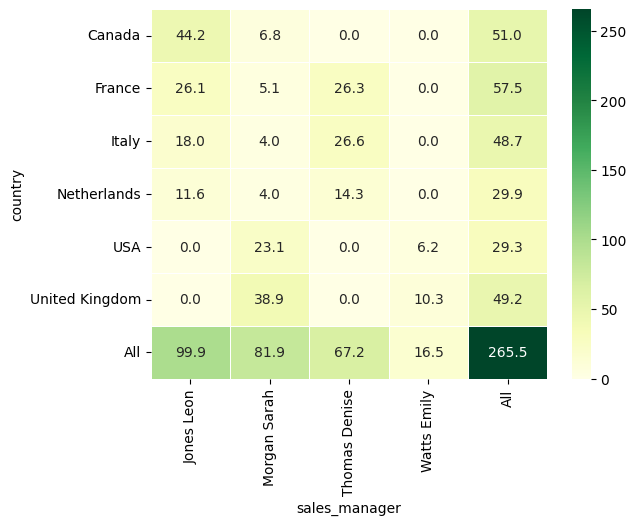

In [14]:
import seaborn as sns
sns.heatmap(df_actual_pivot, annot=True, fmt=".1f", linewidths=.5, cmap="YlGn")

# Cvičení

## Titanic

V souboru [titanic.csv](titanic.csv) najdeš informace o cestujících na zaoceánském parníku Titanic. Vytvoř kontingenční tabulku, která porovná závislost mezi pohlavím cestujícího (soupec `Sex`) a tím, jesti přežil potopení Titanicu (sloupec `Survived`). Dále vytvoř další kontingenční tabulku, která porovná závislost mezi třídou (sloupec `Pclass`), ve které cestoval, a tím, jestli přežil. Zkus spočítat relativní počty u jednotlivých tabulek.

Dále yužij metodu `cut` na rozdělení cestujících do věkových skupin (zkus vytvořit např. 4 skupiny, můžeš definovat hranice skupin tak, aby vznikly skupiny děti, teenageři, dospělí a senioři). Urči počet přeživších pro jednotlivé věkové skupiny.

In [17]:
import pandas
titanic = pandas.read_csv("titanic.csv")
titanic.head()


Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

In [30]:
titanic_pivot = pandas.pivot_table(data=titanic, values="Name", index="Survived", columns="Sex", aggfunc=len)
titanic_pivot


Sex       female  male
Survived              
0             81   464
1            233   109

In [42]:
titanic_pivot = pandas.pivot_table(data=titanic, values="Name", index="Survived", columns="Sex", aggfunc=len, margins=True)
titanic_pivot = titanic_pivot.div(titanic_pivot.iloc[-1, :], axis=1)
titanic_pivot

Sex         female      male       All
Survived                              
0         0.257962  0.809773  0.614431
1         0.742038  0.190227  0.385569
All       1.000000  1.000000  1.000000

In [21]:
titanic_pivot = pandas.pivot_table(data=titanic, values="Name", index="Survived", columns="Pclass", aggfunc=len, margins=True)
titanic_pivot


Pclass      1    2    3  All
Survived                    
0          80   97  368  545
1         136   87  119  342
All       216  184  487  887

In [29]:
# titanic_pivot = pandas.pivot_table(data=titanic, values="Name", index="Survived", columns="Pclass", aggfunc=len, margins=True)
titanic_pivot_percentage = titanic_pivot.div(titanic_pivot.iloc[-1, :], axis=1) # dělení po řádku
titanic_pivot_percentage


Pclass          1         2         3       All
Survived                                       
0         0.37037  0.527174  0.755647  0.614431
1         0.62963  0.472826  0.244353  0.385569
All       1.00000  1.000000  1.000000  1.000000

In [43]:
titanic["group"] = pandas.cut(titanic["Age"], [0, 15, 19, 60, float("inf")], labels=["children", "teenagers", "adults", "senior"])
titanic



Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
0      male  22.0                        1                        0   7.2500   
1    female  38.0                        1                        0  71.2833   
2    female  26.0                        0                        0   7.9250   
3    female  35.0                        1                        0  53.1000   
4      male  35.0                        0                        0   8.0500   
..      ...   ...                      ...                      ...      ...   
882    male  27.0                        0                        0  13.0000   
883  female  19.0                        0                        0  30.0000   
884  female   7.0                        1                        2  23.4500   
885    male  26.0                        0                        0  30.0000   
886    male  32.0                        0                        0   7.7500   

         group  
0       adults  
1       adults  
2       adults  
3       adults  
4       adults  
..         ...  
882     adults  
883  teenagers  
884   children  
885     adults  
886     adults  

[887 rows x 9 columns]

In [44]:
titanic = pandas.pivot_table(data=titanic, values="Name", index="Survived", columns="group", aggfunc=len, margins=True)
titanic

group     children  teenagers  adults  senior  All
Survived                                          
0               42         68     414      21  545
1               52         37     248       5  342
All             94        105     662      26  887